# AED - à vous de jouer !

David Scanu

---

Vous allez adapter les notebooks initialement développés pour analyser un nouveau jeu de données

### Contexte du projet
Dans le brief précédant, vous aviez imiter les étapes de notebooks pour l'analyse exploratoire de données. Vous commencez à comprendre la manière de procéder à l'analyse d'un jeux de données. Ça tombe bien, vous venez de recevoir un nouveau jeu de données et cette fois c'est à vous d'adapter les notebooks dévéloppés précédemment pour en ressortir une analyse exploratoire adaptée en gardant en tête les étapes suivantes :

1. Importer les bibliothèques adéquates.
2. Importer le jeu de données.
3. Voir s’il y a des valeurs manquantes
4. Supprimer une ligne contenant des valeurs manquantes (dropna)/transformer les valeurs manquantes (SimpleImputer).
5. Encoder les valeurs catégoriques (LabelEncoder).
6. Visualisation et analyse de données : Distribution, corrélations, outliers …
7. Fractionner le jeu de données pour l’entrainement et le test (voir sklearn.model_selection.train_test_split Training and Test set).
8. Mise à l’échelle des caractéristiques/features (StandardScaler, MinMaxScaler, RobustScaler).

### Modalités pédagogiques

Travail en groupe de 2-3 à rendre pour le vendredi 18/11/2022

### Critères de performance

Les codes du notebook fonctionnent
L'Analyse exploratoire des données est cohérente.

### Modalités d'évaluation

Revue de code avec le formateur.
Restitution orale de chaque groupe

### Livrables

Un notebook réalisant l'analyse exploratoire du jeux de données

#### A propos de ce jeu de données : 

- **age**: Age of the patient
 - **sex**: Sex of the patient
- **cp** : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- **trtbps*** : resting blood pressure (in mm Hg)
- **chol**: cholestoral in mg/dl fetched via BMI sensor
- **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- **rest_ecg**: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalach**: maximum heart rate achieved
- **exang**: exercise induced angina (yes; no)
- **oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)
- **slp**: the slope of the peak exercise ST segment, 0: downsloping; 1: flat; 2: upsloping
- **ca**: number of major vessels (0-3)
- **target**: ‘less chance’ = less chance of heart attack ‘more chance’= more chance of heart attack

### Importer les bibliothèques adéquates.

In [601]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

### Importer le jeu de données.

In [602]:
data = pd.read_csv('data/data.csv')

### Vérifier le type de données

In [603]:
rows = data.shape[0]
columns = data.shape[1]
print(f"Le jeu de données a {rows} lignes et {columns} colonnes.")

Le jeu de données a 303 lignes et 14 colonnes.


In [604]:
data.info() # Les types de données (int, object, float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [605]:
for i in data.columns:
    print(i,len(data[i].unique()))

age 41
sex 2
cp 4
trtbps 49
chol 152
fbs 2
restecg 3
thalachh 91
exng 2
oldpeak 40
slp 3
caa 5
thall 4
output 2


In [606]:
print(data.head()) # Montre les 10 premières lignes du jeu de données

   age sex  cp  trtbps  chol  fbs  restecg  thalachh exng  oldpeak  slp  caa  \
0   63   M   3     145   233    1        0       150   no      2.3    0    0   
1   37   M   2     130   250    0        1       187   no      3.5    0    0   
2   41   F   1     130   204    0        0       172   no      1.4    2    0   
3   56   M   1     120   236    0        1       178   no      0.8    2    0   
4   57   F   0     120   354    0        1       163  yes      0.6    2    0   

   thall       output  
0      1  more chance  
1      2  more chance  
2      2  more chance  
3      2  more chance  
4      2  more chance  


### Voir s’il y a des valeurs manquantes

In [607]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Il n'y a pas de valeurs manquantes dans le jeu de données.

### Supprimer une ligne contenant des valeurs manquantes

Nous créons un jeu de données dans lequel il y a des valeurs manquantes (NaN). Nous l'importons dans le notebook.

In [608]:
df_nan = pd.read_csv('data/data_nan.csv')
df_nan.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,M,3,145,NaN,1.0,0,150.0,no,2.3,0,0.0,1,more chance
1,37.0,M,2,NaN,250.0,0.0,1,187.0,no,3.5,0,0.0,2,more chance
2,41.0,F,1,130,204.0,0.0,0,NaN,no,1.4,2,0.0,2,NaN
3,56.0,M,1,120,236.0,0.0,1,178.0,no,NaN,2,NaN,2,more chance
4,57.0,F,0,120,354.0,0.0,1,163.0,yes,0.6,2,0.0,2,more chance


Affichons les colonnes ou figurent des données manquantes.

In [609]:
print(df_nan.isnull().sum())

age         7
sex         3
cp          0
trtbps      5
chol        4
fbs         1
restecg     0
thalachh    7
exng        2
oldpeak     3
slp         0
caa         1
thall       0
output      4
dtype: int64


#### Dropna

Nous supprimons les élements qui contiennent des valuers manquantes.

In [610]:
df_no_nan = df_nan.dropna()

Il n'y a  plus de valeurs manquantes dans le jeu de données.

In [611]:
print(df_no_nan.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


#### Remplacer les valeurs manquantes par le mode

Remplaçons les données manquantes par le mode (la valeur la plus fréquente), cela nous permettra de traiter les caractéristiques catégorielles (Sexe, Outuput), en utilisant SimpleImputer.

In [612]:
print(df_nan.isnull().sum()) # Affichons les colonnes ou figurent des données manquantes

age         7
sex         3
cp          0
trtbps      5
chol        4
fbs         1
restecg     0
thalachh    7
exng        2
oldpeak     3
slp         0
caa         1
thall       0
output      4
dtype: int64


Nous utilisons SimpleImputer pour remplacer les valeurs manquantes par la valeur la plus fréquent, pour chaque colonne du DataFrame.

In [613]:
from sklearn.impute import SimpleImputer # Importons SimpleImputer

imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df_nan)
df_no_nan_mode = pd.DataFrame(imputer.transform(df_nan.loc[:,:]), 
                  columns = df_nan.columns)
df_no_nan_mode.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,M,3,145,204.0,1.0,0,150.0,no,2.3,0,0.0,1,more chance
1,37.0,M,2,120,250.0,0.0,1,187.0,no,3.5,0,0.0,2,more chance
2,41.0,F,1,130,204.0,0.0,0,162.0,no,1.4,2,0.0,2,more chance
3,56.0,M,1,120,236.0,0.0,1,178.0,no,0.0,2,0.0,2,more chance
4,57.0,F,0,120,354.0,0.0,1,163.0,yes,0.6,2,0.0,2,more chance


Il n'y a plus de valuers manquantes.

In [614]:
print(df_no_nan_mode.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


### Encoder les valeurs catégoriques

Nous devons encoder les valeurs qui sont des 'objects' (catégories), en valeurs numériques :

In [662]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


Nous transformons les valeurs "catégoriques" en valeurs numériques : 'sex', 'exng' et 'output'.

#### Label Encoder : for 'Output' (target, y)

In [616]:
from sklearn.preprocessing import LabelEncoder

# Copie du dataset
data_enc = data.copy()
data_enc.head() # Avant encodage

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,M,3,145,233,1,0,150,no,2.3,0,0,1,more chance
1,37,M,2,130,250,0,1,187,no,3.5,0,0,2,more chance
2,41,F,1,130,204,0,0,172,no,1.4,2,0,2,more chance
3,56,M,1,120,236,0,1,178,no,0.8,2,0,2,more chance
4,57,F,0,120,354,0,1,163,yes,0.6,2,0,2,more chance


In [617]:
# Using LabelEncoder
# Encode target labels with value between 0 and n_classes-1.
# This transformer should be used to encode target values, i.e. y, and not the input X.

# Why you shouldn't be using LabelEncoder for categorical features
# https://towardsdatascience.com/a-common-mistake-to-avoid-when-encoding-ordinal-features-79e402796ab4


labelencoder_output = LabelEncoder()
data_enc['output_encoded'] = labelencoder_output.fit_transform(data_enc['output'])

print(data_enc['output_encoded'])
print(labelencoder_output.classes_)

# 0 = Less Chance
# 1 = More Chance

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output_encoded, Length: 303, dtype: int64
['less chance' 'more chance']


#### Label Encoder : for 'Sex'

In [618]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder()
# transformed = ohe.fit_transform(data_enc[['sex']])

# transformed = ohe.fit_transform(data_enc[['sex']])
# print(transformed)

labelencoder_sex = LabelEncoder()
data_enc['sex_encoded'] = labelencoder_sex.fit_transform(data_enc['sex'])

print(data_enc['sex_encoded'])
print(labelencoder_sex.classes_)

# 0 = Male
# 1 = Female


0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex_encoded, Length: 303, dtype: int64
['F' 'M']


#### Label Encoder : for 'exng'

In [619]:
labelencoder_exng = LabelEncoder()
data_enc['exng_encoded'] = labelencoder_exng.fit_transform(data_enc['exng'])

print(data_enc['exng_encoded'])
print(labelencoder_exng.classes_)

# 0 = no
# 1 = yes

0      0
1      0
2      0
3      0
4      1
      ..
298    1
299    0
300    0
301    1
302    0
Name: exng_encoded, Length: 303, dtype: int64
['no' 'yes']


Les caractères catégoriels sont : 
* sex (0-1)
* cp (0-3)
* restecg (0-2)
* slp (0-2)
* thall (0-3)
* output (0-1)

In [620]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             303 non-null    int64  
 1   sex             303 non-null    object 
 2   cp              303 non-null    int64  
 3   trtbps          303 non-null    int64  
 4   chol            303 non-null    int64  
 5   fbs             303 non-null    int64  
 6   restecg         303 non-null    int64  
 7   thalachh        303 non-null    int64  
 8   exng            303 non-null    object 
 9   oldpeak         303 non-null    float64
 10  slp             303 non-null    int64  
 11  caa             303 non-null    int64  
 12  thall           303 non-null    int64  
 13  output          303 non-null    object 
 14  output_encoded  303 non-null    int64  
 15  sex_encoded     303 non-null    int64  
 16  exng_encoded    303 non-null    int64  
dtypes: float64(1), int64(13), object(3)

In [621]:
# Remove non-encoded columns
data_enc = data_enc.drop(['sex', 'exng', 'output'], axis=1)

In [622]:
# Réorganisation de l'ordre des colonnes
data_enc = data_enc.loc[:, ["age","sex_encoded", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh", "exng_encoded", "oldpeak", "slp", "caa", "thall", "output_encoded"]]

In [623]:
data_enc.info() # Les colonnes sont : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             303 non-null    int64  
 1   sex_encoded     303 non-null    int64  
 2   cp              303 non-null    int64  
 3   trtbps          303 non-null    int64  
 4   chol            303 non-null    int64  
 5   fbs             303 non-null    int64  
 6   restecg         303 non-null    int64  
 7   thalachh        303 non-null    int64  
 8   exng_encoded    303 non-null    int64  
 9   oldpeak         303 non-null    float64
 10  slp             303 non-null    int64  
 11  caa             303 non-null    int64  
 12  thall           303 non-null    int64  
 13  output_encoded  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Selection des caractère pertinents

In [624]:
data.describe()

,age,cp,trtbps,chol,fbs,restecg,thalachh,oldpeak,slp,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,6.200000,2.000000,4.000000,3.000000


Comptons le nombre d'hommes et de femmes dans le jeu de données.

In [625]:
data['sex'].value_counts() #

M    207
F     96
Name: sex, dtype: int64

##### 1.Sélection univariée

Des tests statistiques peuvent être utilisés pour sélectionner certaines caractéristiques qui ont la meilleure relation avec la variable de performance. La bibliothèque scikit-learn fournit la classe **SelectKBest** qui peut être utilisée pour sélectionner un nombre spécifique de fonctionnalités dans une suite de différents tests statistiques.

L'exemple suivant utilise le test statistique du chi carré (chi2) pour les caractéristiques non négatives afin de sélectionner 13 des meilleures caractéristiques du jeu de données.

In [626]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             303 non-null    int64  
 1   sex_encoded     303 non-null    int64  
 2   cp              303 non-null    int64  
 3   trtbps          303 non-null    int64  
 4   chol            303 non-null    int64  
 5   fbs             303 non-null    int64  
 6   restecg         303 non-null    int64  
 7   thalachh        303 non-null    int64  
 8   exng_encoded    303 non-null    int64  
 9   oldpeak         303 non-null    float64
 10  slp             303 non-null    int64  
 11  caa             303 non-null    int64  
 12  thall           303 non-null    int64  
 13  output_encoded  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [627]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Les caractères
X = data_enc.iloc[:,0:13]
# La cible
y = data_enc.iloc[:,-1]

# apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
# Fabircation d'un dataframe des résultats
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# concat des deux DF
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print best features

           Specs       Score
7       thalachh  188.320472
9        oldpeak   72.644253
11           caa   66.440765
2             cp   62.598098
8   exng_encoded   38.914377
4           chol   23.936394
0            age   23.286624
3         trtbps   14.823925
10           slp    9.804095
1    sex_encoded    7.576835
12         thall    5.791853
6        restecg    2.978271


##### 2. Importance de l'entité
Vous pouvez obtenir l'importance de chaque entité de votre jeu de données à l'aide de la propriété Caractéristiques du modèle. La valeur de caractéristique vous donne un score pour chaque fonction de vos résultats, plus le score est élevé, plus la variable de performance est significative ou appropriée. L'importance des fonctionnalités est la classe intégrée fournie avec les classificateurs basés sur les arbres, nous utiliserons le classificateur d'arbre supplémentaire pour extraire les principales fonctionnalités de l'ensemble de données.

[0.07142272 0.05538762 0.12283038 0.05951994 0.06107058 0.01937224
 0.03509627 0.08920756 0.09686133 0.08736754 0.06638475 0.1309512
 0.10452787]


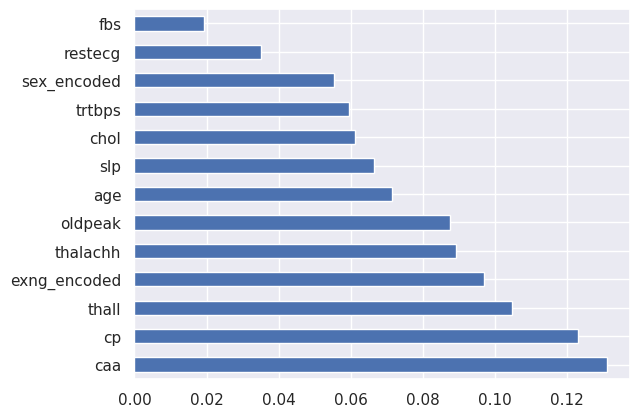

In [628]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

##### 3. Matrice de corrélation avec carte thermique

La **corrélation** indique comment les caractéristiques sont liées les unes aux autres ou à la variable cible. La corrélation peut être positive (l'augmentation d'une valeur de la caractéristique augmente la valeur de la variable cible) ou négative (l'augmentation d'une valeur de la caractéristique diminue la valeur de la variable cible).

**Heatmap** permet de classer facilement les caractéristiques les plus pertinentes à la variable cible, et nous tracerons les caractéristiques associées de la carte thermique à l'aide de la bibliothèque seaborn.

La corrélation indique si les caractéristiques sont liées les unes aux autres ou à la variable cible. La corrélation peut être positive (augmentation d'une valeur, la valeur de la variable objectif augmente) ou négative (augmentation d'une valeur, la valeur de la variable cible diminue).

À partir de cette carte thermique, nous pouvons observer que la **douleur thoracique « cp »** est fortement liée à la **variable cible**. Par rapport à la relation entre les deux autres variables, nous pouvons dire que **la douleur thoracique contribue le plus à la prédiction de la présence d'une maladie cardiaque**.

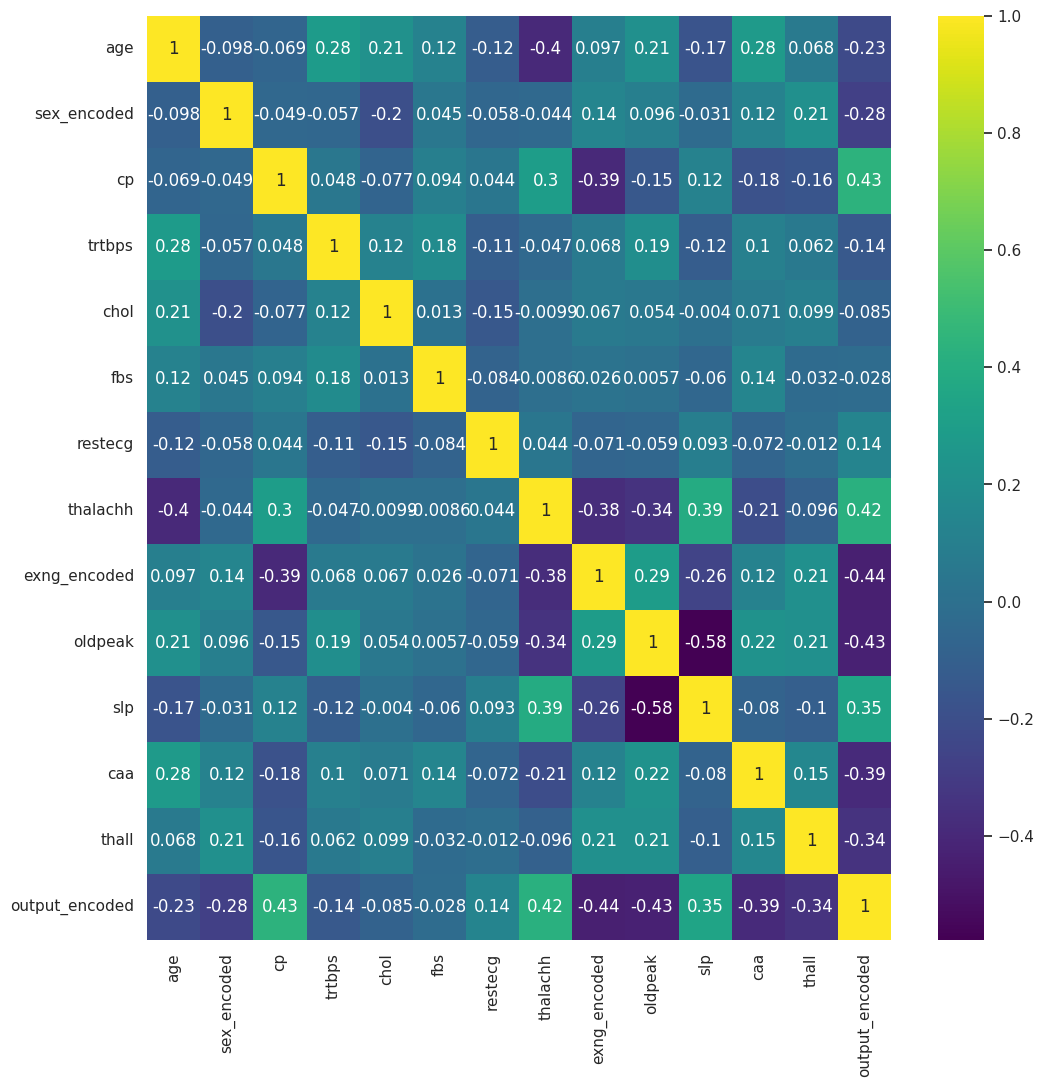

In [629]:
sns.heatmap(data_enc.corr(), annot=True, cmap='viridis')

fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.show()

Les graphiques Boxplot nous montre les outliers, cad les valeurs ponctuelles qui sortent de la distribution standard. 

### Visualisation des données

In [630]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

In [631]:
# Preparation du dataset
data_no_enc_fr = data_enc.copy()
def chng(sex):
    if sex == 0:
        return 'Femme'
    else:
        return 'Homme'
data_no_enc_fr['sex'] = data_no_enc_fr['sex_encoded'].apply(chng)
def chng2(prob):
    if prob == 0:
        return 'Maladie cardiaque'
    else:
        return 'Absence maladie cardiaque'
data_no_enc_fr['output'] = data_no_enc_fr['output_encoded'].apply(chng2)

In [632]:
data_no_enc_fr = data_no_enc_fr.drop(['sex_encoded', 'output_encoded'], axis=1)
data_no_enc_fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   cp            303 non-null    int64  
 2   trtbps        303 non-null    int64  
 3   chol          303 non-null    int64  
 4   fbs           303 non-null    int64  
 5   restecg       303 non-null    int64  
 6   thalachh      303 non-null    int64  
 7   exng_encoded  303 non-null    int64  
 8   oldpeak       303 non-null    float64
 9   slp           303 non-null    int64  
 10  caa           303 non-null    int64  
 11  thall         303 non-null    int64  
 12  sex           303 non-null    object 
 13  output        303 non-null    object 
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


#### Countplot

Text(0.5, 1.0, 'Sexe vs Output')

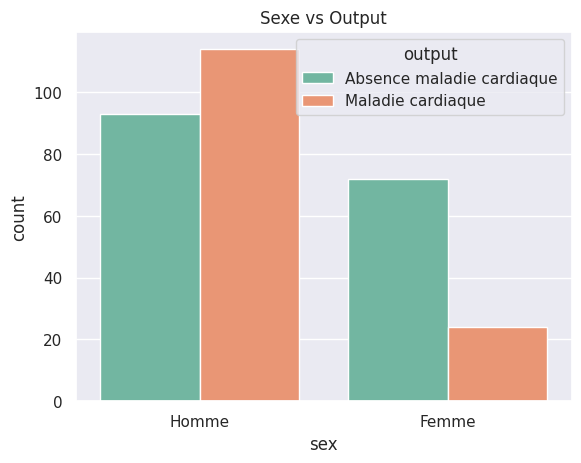

In [633]:
sns.countplot(data=data_no_enc_fr, x='sex',hue='output')
plt.title('Sexe vs Output')

# 0 = More chance
# 1 = Less chance

Les hommes sont plus susceptibles d'avoir une maladie cardiaque que les femmes.

Text(0.5, 1.0, 'Types de douleurs abdominales vs Maladies cardiaques')

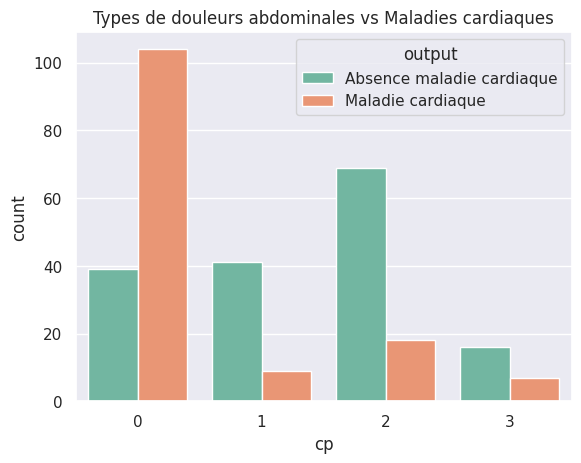

In [634]:
sns.countplot(data=data_no_enc_fr, x='cp',hue='output')
plt.title('Types de douleurs abdominales vs Maladies cardiaques')

Il y a 4 types de douleurs abdominales ('cp'), voici la description de la caractéristique qui est donnée :

- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic

Il n'y a pas de valeur 0 dans la description, (ni de valeur 4 dans le dataset).

**La valeur 0 semble être celle chez qui l'on trouve le plus de maladie cardiaque.** Mais nous ne pouvons pas savoir à quel symptome de douleur abdominale elle correspond.

Je trouve cette description sur internet : 

- Value 0: asymptomatic
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: typical angina

Text(0.5, 1.0, 'Slope vs Output')

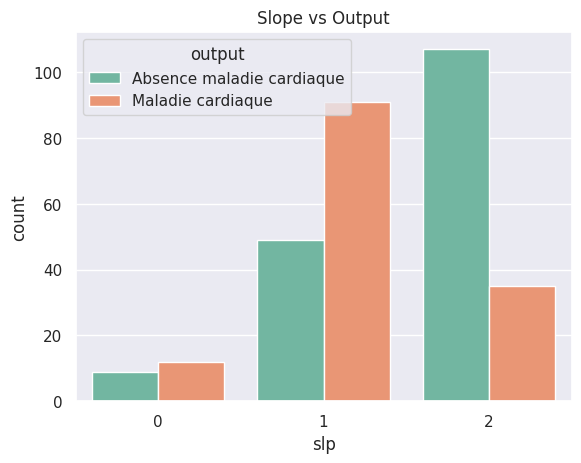

In [635]:
sns.countplot(data=data_no_enc_fr, x='slp',hue='output')
plt.title('Slope vs Output')

**slp**: the slope of the peak exercise ST segment, 0: downsloping; 1: flat; 2: upsloping

La valeur "1" de Slope semble contenir plus de maladie cardiaque.

Text(0.5, 1.0, 'Sexe vs Output')

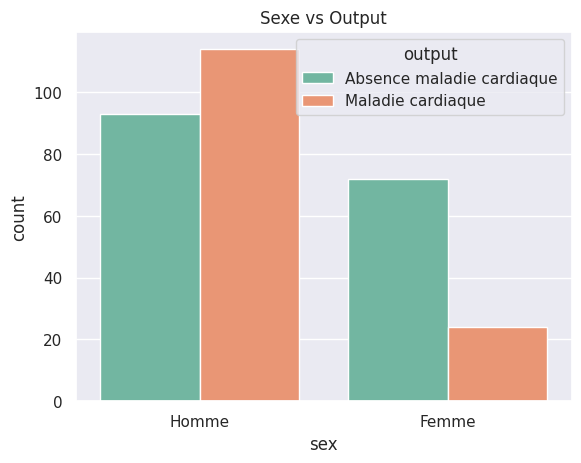

In [636]:
sns.countplot(data=data_no_enc_fr, x='sex', hue='output')
plt.title('Sexe vs Output')

#### Distribution

Text(0.5, 1.0, 'Age des patients atteints de maladie cardiaques')

<Figure size 1600x700 with 0 Axes>

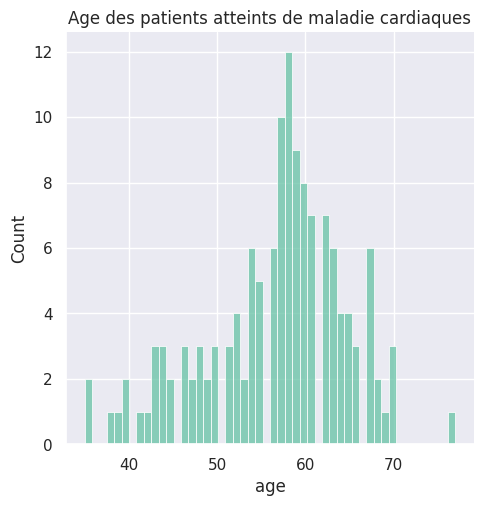

In [637]:
plt.figure(figsize=(16,7))
sns.displot(data_enc[data_enc['output_encoded']==0]['age'], kde=False, bins=50)
plt.title('Age des patients atteints de maladie cardiaques')

Les maladies cardiaques sont **très courantes chez les personnes âgées, composées du groupe d'âge de 60 ans et plus**, et **courantes chez les adultes appartenant au groupe d'âge de 41 à 60 ans**.

Elles sont **rares dans le groupe d'âge de 19 à 40 ans** et très rares dans le groupe d'âge. de 0 à 18.

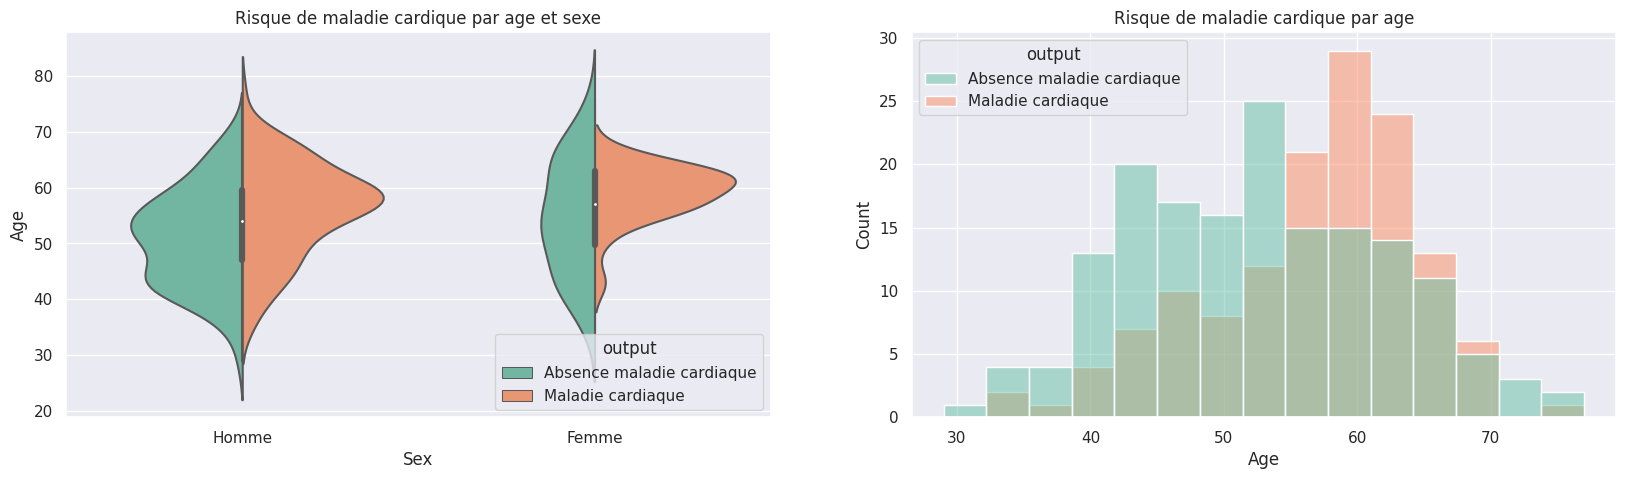

In [638]:
f, ax = plt.subplots(1, 2, figsize=(20, 5))
#1
sns.violinplot(x='sex', y='age', hue='output', data=data_no_enc_fr, split=True, ax=ax[0])
ax[0].set(ylabel='Age', xlabel='Sex', title='Risque de maladie cardique par age et sexe')
#2
sns.histplot(data_no_enc_fr, x='age', hue='output', ax=ax[1], bins=15)
ax[1].set(xlabel='Age', title='Risque de maladie cardique par age')
plt.show()

Text(0.5, 1.0, 'Cholesterol des patients atteints de maladie cardique')

<Figure size 1600x1600 with 0 Axes>

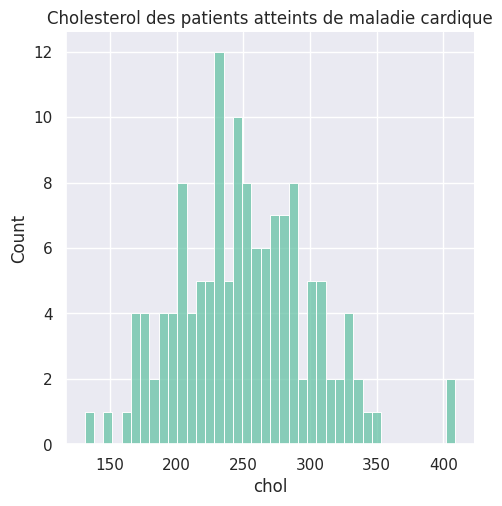

In [639]:
plt.figure(figsize=(16,16))
sns.displot(data = data_enc[data_enc['output_encoded']==0]['chol'],kde=False,bins=40)
plt.title('Cholesterol des patients atteints de maladie cardique')

Text(0.5, 1.0, 'Cholesterol des patients atteints de maladie cardique')

<Figure size 1600x1600 with 0 Axes>

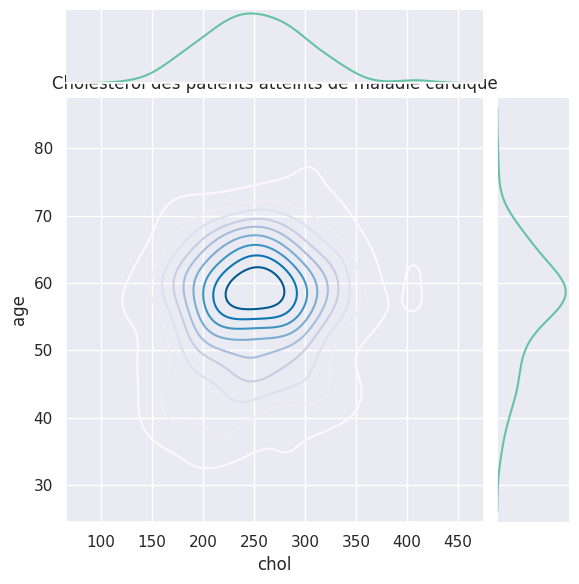

In [640]:
plt.figure(figsize=(16,16))
sns.jointplot(data= data_enc[data_enc['output_encoded']==0],
              x='chol',
              y='age',
              kind='kde',
              cmap='PuBu'
              )
plt.title('Cholesterol des patients atteints de maladie cardique')

La plupart des patients avec des maladies cardiques ont entre 55 et 65 ans, et ont un taux de cholesterol entre 200 et 300 mg/L.

#### Boxplot

<AxesSubplot: xlabel='output', ylabel='age'>

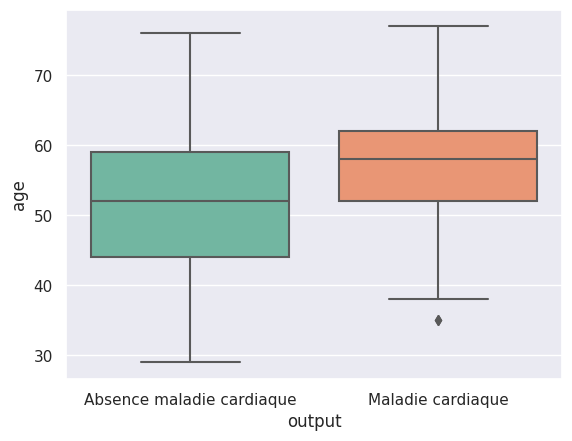

In [641]:
sns.boxplot(data=data_no_enc_fr, x='output', y='age')

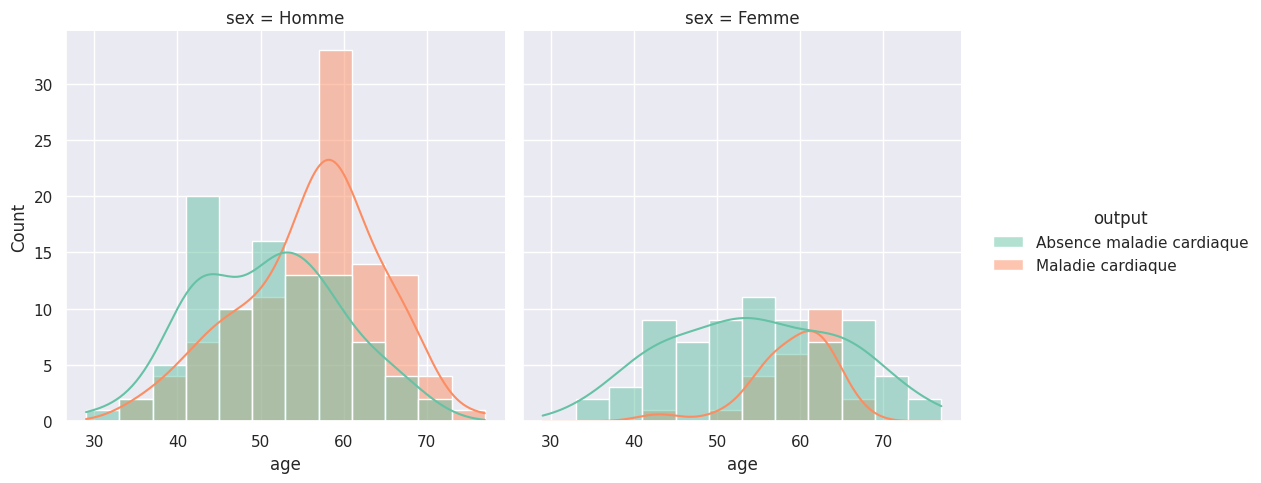

In [642]:
sns.displot(data=data_no_enc_fr, x="age", col="sex", hue="output", kde=True)

In [643]:
data_no_enc_fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   cp            303 non-null    int64  
 2   trtbps        303 non-null    int64  
 3   chol          303 non-null    int64  
 4   fbs           303 non-null    int64  
 5   restecg       303 non-null    int64  
 6   thalachh      303 non-null    int64  
 7   exng_encoded  303 non-null    int64  
 8   oldpeak       303 non-null    float64
 9   slp           303 non-null    int64  
 10  caa           303 non-null    int64  
 11  thall         303 non-null    int64  
 12  sex           303 non-null    object 
 13  output        303 non-null    object 
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


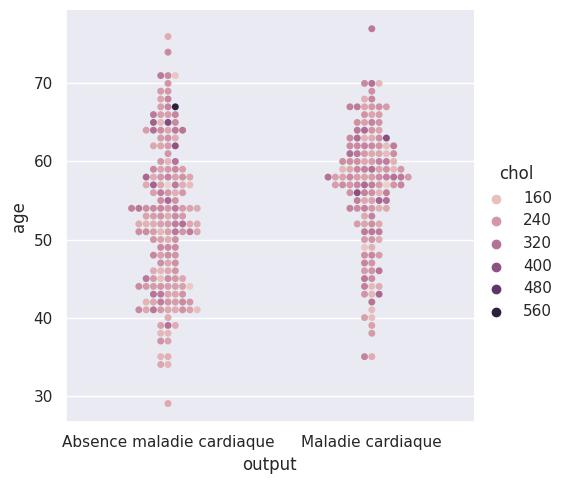

In [644]:
sns.catplot(data=data_no_enc_fr, kind="swarm", x="output", y="age", hue="chol")

Le cholesterol ne semble pas etre une caractéristique préponderante dans les maladies cardiaques (SIC).

### Supprimer les colonnes inutiles

In [645]:
# Nous supprimons les colonnes qui nous semblent inutiles pour notre ML
# (faible corrélation avec 'output', etc... )
# data_enc.drop([], axis=1)

### Recherche des Outliers (Valeurs abérrantes)

Les **valeurs aberrantes** sont des points de données dans un ensemble de données qui sont considérés comme extrêmes, faux ou non représentatifs de ce que les données décrivent. Ces valeurs aberrantes peuvent être causées soit par une collecte de données incorrectes, soit par de véritables observations aberrantes. La suppression de ces valeurs aberrantes aidera souvent votre modèle à mieux généraliser, car ces observations à longue traîne pourraient fausser l'apprentissage.

In [646]:
for i in data_no_enc_fr.columns:
    print(i,len(data_no_enc_fr[i].unique()))

age 41
cp 4
trtbps 49
chol 152
fbs 2
restecg 3
thalachh 91
exng_encoded 2
oldpeak 40
slp 3
caa 5
thall 4
sex 2
output 2


<AxesSubplot: >

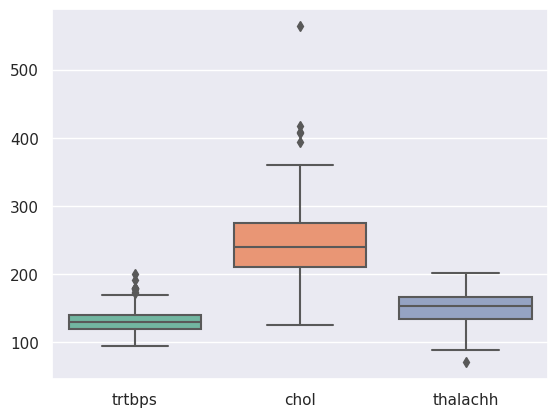

In [647]:
sns.boxplot(data_enc[['trtbps', 'chol', 'thalachh']])

<AxesSubplot: >

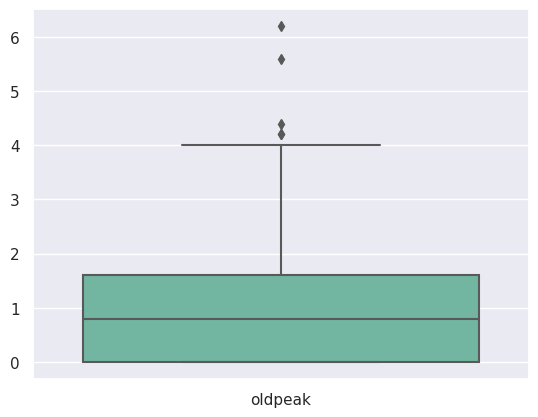

In [648]:
sns.boxplot(data_enc[['oldpeak']])

<AxesSubplot: >

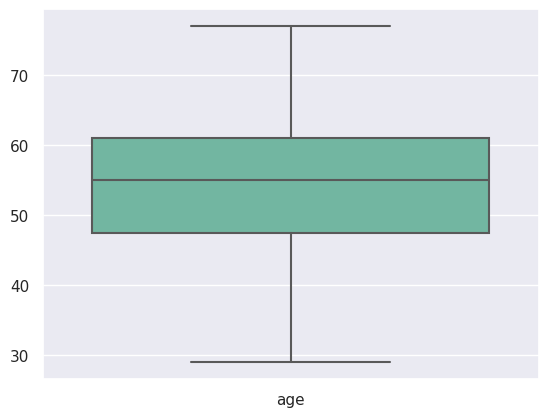

In [649]:
sns.boxplot(data_enc[['age']])

Il n'y a pas de d'outliers dans les ages.

In [650]:
# Remove outliers (je ne trouve pas de solution satisfaisante)

<AxesSubplot: >

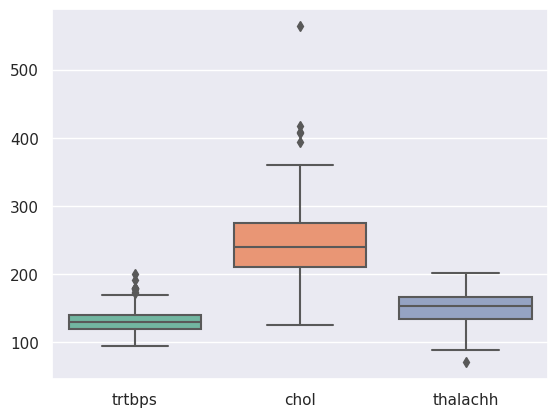

In [651]:
sns.boxplot(data_enc_no_ouliers[['trtbps', 'chol', 'thalachh']])

### Fractionner le jeu de données pour l’entrainement et le test


(voir sklearn.model_selection.train_test_split Training and Test set).

In [683]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             303 non-null    int64  
 1   sex_encoded     303 non-null    int64  
 2   cp              303 non-null    int64  
 3   trtbps          303 non-null    int64  
 4   chol            303 non-null    int64  
 5   fbs             303 non-null    int64  
 6   restecg         303 non-null    int64  
 7   thalachh        303 non-null    int64  
 8   exng_encoded    303 non-null    int64  
 9   oldpeak         303 non-null    float64
 10  slp             303 non-null    int64  
 11  caa             303 non-null    int64  
 12  thall           303 non-null    int64  
 13  output_encoded  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [684]:
data_x = data_enc.drop('output_encoded', axis=1)
data_y = data_enc['output_encoded']

In [685]:
from sklearn.model_selection import train_test_split

# Features
training_data_x, testing_data_x, training_data_y, testing_data_y = train_test_split(data_x, data_y, test_size=0.2, random_state=25)

print(f"Nombre d'exemples d'entrainement X : {training_data_x.shape[0]}")
print(f"Nombre d'exemples de test X : {testing_data_x.shape[0]}")

print(f"Nombre d'exemples d'entrainement Y : {training_data_y.shape[0]}")
print(f"Nombre d'exemples de test Y : {testing_data_y.shape[0]}")

Nombre d'exemples d'entrainement X : 242
Nombre d'exemples de test X : 61
Nombre d'exemples d'entrainement Y : 242
Nombre d'exemples de test Y : 61


#### Qu'est-ce que la mise à l'échelle des fonctionnalités ?

La mise à l'échelle des entités est le processus de mise à l'échelle des valeurs des entités dans un jeu de données afin qu'elles contribuent proportionnellement au calcul de la distance.

Les deux techniques de mise à l'échelle des caractéristiques les plus couramment utilisées sont la **normalisation** (ou la normalisation du score Z) et la **Standardisation** (également connue sous le nom de normalisation Z-Score).

#### Standardisation : StandardScaler

In [686]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
training_data_x_scaler = scaler.fit_transform(training_data_x)
# testing_data_x_scaler = scaler.transform(testing_data_x)

In [687]:
print(training_data_x_scaler)

[[-1.86568937  0.69617712  0.98300331 ... -2.27476916 -0.70929937
  -0.55759823]
 [-1.3274242  -1.43641607  0.98300331 ... -0.65566876 -0.70929937
  -0.55759823]
 [-0.78915903  0.69617712 -0.94320561 ...  0.96343165 -0.70929937
  -0.55759823]
 ...
 [-1.0044651   0.69617712 -0.94320561 ... -0.65566876  2.30211198
   1.17238601]
 [ 1.36390167 -1.43641607 -0.94320561 ...  0.96343165  1.2983082
  -0.55759823]
 [-1.3274242   0.69617712  0.01989885 ...  0.96343165 -0.70929937
  -0.55759823]]


La mise à l'échelle des fonctionnalités est l'une des étapes de prétraitement les plus fondamentales que nous devons prendre en compte avant de former des modèles d'apprentissage automatique. La mise à l'échelle des fonctionnalités est nécessaire mais cela dépend du modèle que nous visons à construire (par exemple, les modèles basés sur des arbres ne nécessitent aucune sorte de mise à l'échelle des fonctionnalités) et de la nature de nos valeurs de fonctionnalités.

#### Normalisation : MinMaxScaler

In [688]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
training_data_x_minmaxscaler = min_max_scaler.fit_transform(training_data_x)
# testing_data_x_minmaxscaler = min_max_scaler.transform(testing_data_x)

In [689]:
print(training_data_x_minmaxscaler)

[[0.16666667 1.         0.66666667 ... 0.         0.         0.5       ]
 [0.27083333 0.         0.66666667 ... 0.5        0.         0.5       ]
 [0.375      1.         0.         ... 1.         0.         0.5       ]
 ...
 [0.33333333 1.         0.         ... 0.5        0.75       1.        ]
 [0.79166667 0.         0.         ... 1.         0.5        0.5       ]
 [0.27083333 1.         0.33333333 ... 1.         0.         0.5       ]]


#### RobustScaler

In [690]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
training_data_x_minmaxscaler = robust_scaler.fit_transform(training_data_x)
# testing_data_x_minmaxscaler = robust_scaler.transform(testing_data_x)

In [691]:
print(training_data_x_minmaxscaler)

[[-1.28571429  0.          0.5        ... -1.          0.
   0.        ]
 [-0.92857143 -1.          0.5        ...  0.          0.
   0.        ]
 [-0.57142857  0.         -0.5        ...  1.          0.
   0.        ]
 ...
 [-0.71428571  0.         -0.5        ...  0.          3.
   1.        ]
 [ 0.85714286 -1.         -0.5        ...  1.          2.
   0.        ]
 [-0.92857143  0.          0.         ...  1.          0.
   0.        ]]
